# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [6]:
m=1
run = 1

1

Choose your grid

In [7]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [8]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [9]:
using Quadmath, Printf

res=m;
N=2.0^m*1000.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [10]:
print(N)

1000.0

In [11]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [28]:
using Printf
include("./TMYangMillsTHREE.jl");

In [29]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.001
the time step is 0.00020040060140335978


# Initial data of m β Ψ and Ψ,x

In [30]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.08865958683658391#0.0884375
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [31]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [32]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

1001×3 Matrix{Float64}:
 0.0          0.0           0.0
 2.45889e-12  9.53547e-10   1.16396e-8
 8.12471e-12  2.50725e-9    2.47399e-8
 1.48369e-11  3.60786e-9    3.94355e-8
 2.27617e-11  4.57516e-9    5.58711e-8
 3.21048e-11  5.50411e-9    7.42034e-8
 4.31107e-11  6.44048e-9    9.4601e-8
 5.60665e-11  7.41321e-9    1.17246e-7
 7.13091e-11  8.44442e-9    1.42333e-7
 8.92316e-11  9.55343e-9    1.70075e-7
 1.10293e-10  1.07587e-8    2.00697e-7
 1.35027e-10  1.20791e-8    2.34443e-7
 1.64057e-10  1.35344e-8    2.71577e-7
 ⋮                         
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452     0.413926     -1.11225e-10
 0.105452

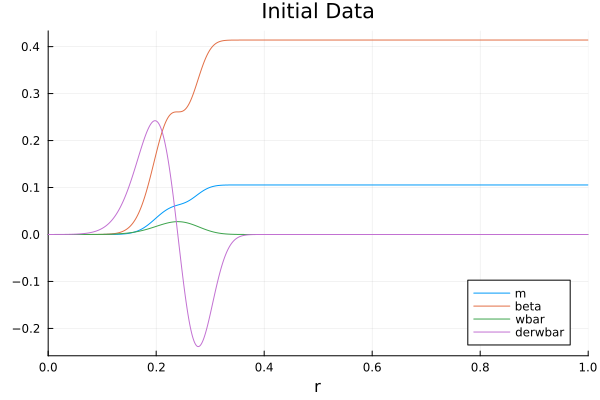

In [33]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [34]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [35]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [36]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [37]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


In [38]:
using Base.Threads
Threads.nthreads()

4

In [39]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.46909779366831617

In [40]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [41]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 0.000200400600801087, t=0.10020030040164439 speed is 0.49900049999978646, dx/dt=4.990004999997864


iteration 1000 dt is 0.00020040060080469939, t=0.20040060080268213 speed is 0.4990004999907915, dx/dt=4.990004999907915


iteration 1500 dt is 0.00020040060083233665, t=0.3006009012105846 speed is 0.49900049992197437, dx/dt=4.990004999219742


iteration 2000 dt is 0.00020040060083580084, t=0.40080120163181016 speed is 0.49900049991334844, dx/dt=4.990004999133484


iteration 2500 dt is 0.00016681771245197346, t=0.4930464897853089 speed is 0.5994567275269995, dx/dt=5.994567275269994


iteration 3000 dt is 0.00014691591432836143, t=0.5709559752528829 speed is 0.6806614549360326, dx/dt=6.806614549360325


iteration 3500 dt is 0.0001283913818409338, t=0.6397854300827389 speed is 0.7788684767322752, dx/dt=7.788684767322752


iteration 4000 dt is 0.00011169969850519976, t=0.6995885306560647 speed is 0.8952575641495119, dx/dt=8.952575641495118


iteration 4500 dt is 0.00010